In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
from itertools import combinations
from collections import Counter
#import requests
#import re
#import os

In [2]:
movies = pd.read_csv("Netflix_Dataset_Movie.csv")
ratings = pd.read_csv("Netflix_Dataset_Rating.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")
tmdb_movies = pd.read_csv("tmdb_5000_movies.csv")
movies

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004,Fidel Castro: American Experience
17767,17768,2000,Epoch
17768,17769,2003,The Company


In [3]:
ratings

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3
...,...,...,...
17337453,520675,3,4496
17337454,1055714,5,4496
17337455,2643029,4,4496
17337456,1559566,3,4496


In [4]:
credits

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [5]:
tmdb_movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [6]:
df_movies = movies[movies.Name.isin(credits.title)]
df_movies

,Movie_ID,Year,Name
2,3,1997,Character
23,24,1981,My Bloody Valentine
29,30,2003,Something's Gotta Give
44,45,1999,The Love Letter
54,55,1995,Jade
...,...,...,...
17742,17743,2003,Better Luck Tomorrow
17757,17758,1979,Prophecy
17761,17762,1997,Gattaca
17763,17764,1998,Shakespeare in Love


In [7]:
df_ratings = ratings[ratings.Movie_ID.isin(df_movies.Movie_ID)]
df_ratings

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3
...,...,...,...
17324875,15737,2,4492
17324876,502274,2,4492
17324877,1326640,3,4492
17324878,633738,3,4492


### Initial EDA analysis as a foundation for the methods in W5 (Apripro/FP-Growth for frequent item-set mining)

Basic statistics: mean, median, and standard deviation

For df_rating: Finding out these values for the Rating column.

For df_movies: Finding out thhe distribution of movies across years. This will to contexualise the ratings to help understand viewer taste and perhaps how rating behaviour changes over time/movie release time.

In [8]:
# For df_ratings
mean_ratings = df_ratings['Rating'].mean()
median_rating = df_ratings['Rating'].median()
std_rating = df_ratings['Rating'].std()

# For df_movies
mean_year = df_movies['Year'].mean()
median_year = df_movies['Year'].median()
std_year = df_movies['Year'].std()

Visualisations:
- Using a histogram for the Rating column of df_ratings to see the frequency of each rating.
- Using a histogram on the year column of df_movies to see the number of movies released year year, only including the movies that have been rated.
- Using scatter plots to visualise the relationships between release year and average rating, as an example.

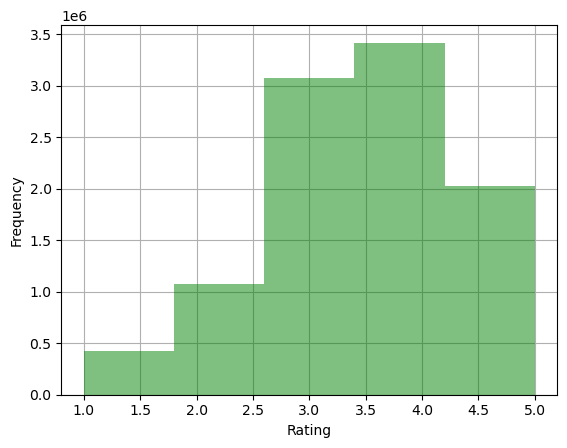

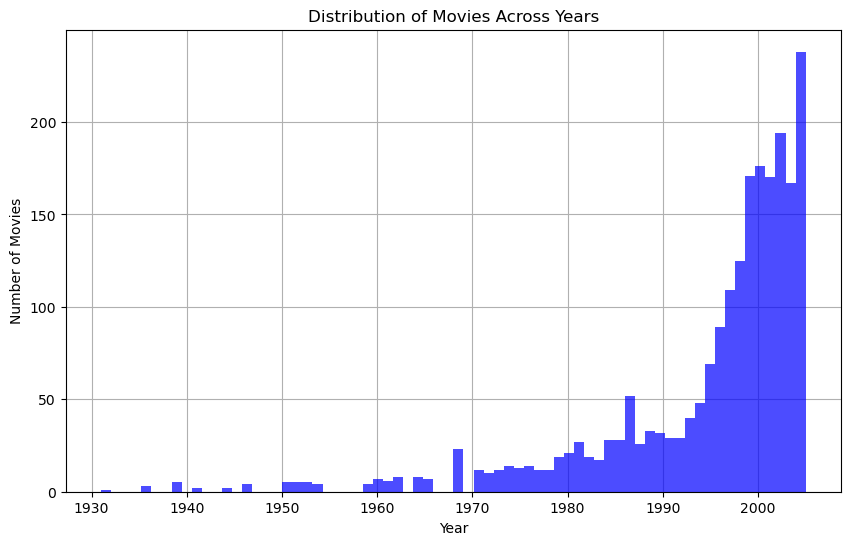

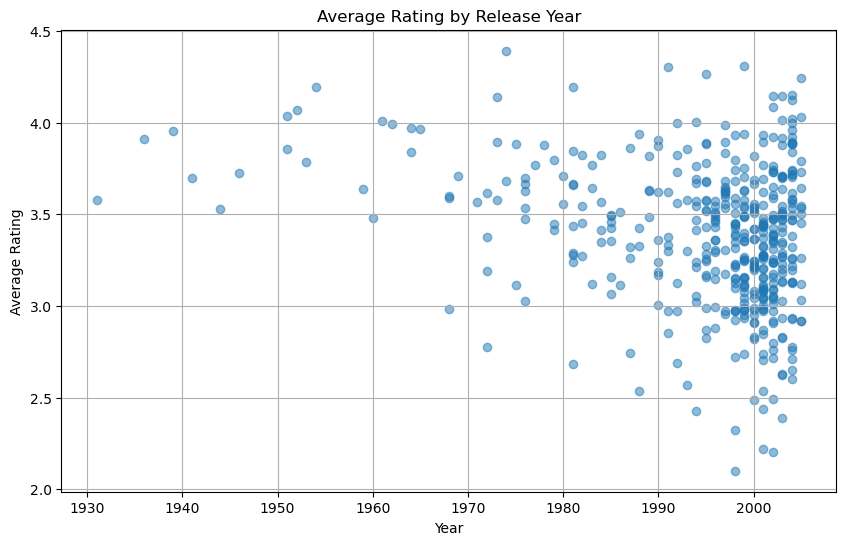

In [9]:
# Merge the dataframes on 'Movie_ID'
df_merged = pd.merge(df_movies, df_ratings, on='Movie_ID')
# Find unique years with ratings
unique_years_with_ratings = df_merged['Year'].unique()
# Filter df_movies using the unique years
df_movies_filtered = df_movies[df_movies['Year'].isin(unique_years_with_ratings)]

# Histogram for Ratings using df_ratings_filtered
plt.hist(df_ratings['Rating'], bins=5, alpha=0.5, color='g', zorder=2)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True, zorder=1)
plt.show()

# Histogram for Year using df_movies_filtered
plt.figure(figsize=(10, 6))
plt.hist(df_movies_filtered['Year'], bins=70, alpha=0.7, color='b', zorder=2)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies Across Years')
plt.grid(True, zorder=1)
plt.show()

# Calculate Average Ratings for Scatter Plot
df_avg_ratings = df_merged.groupby(['Movie_ID', 'Year'])['Rating'].mean().reset_index()

# Scatter Plot for Average Rating by Release Year
plt.figure(figsize=(10, 6))
plt.scatter(df_avg_ratings['Year'], df_avg_ratings['Rating'], alpha=0.5)
plt.title('Average Rating by Release Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

### Initial data transformation and graph analysis as a foundation for methods in W7 (Mining Social-Network Graphs/Betweeness Centrality)

Add weighted edge based on the number of common raters

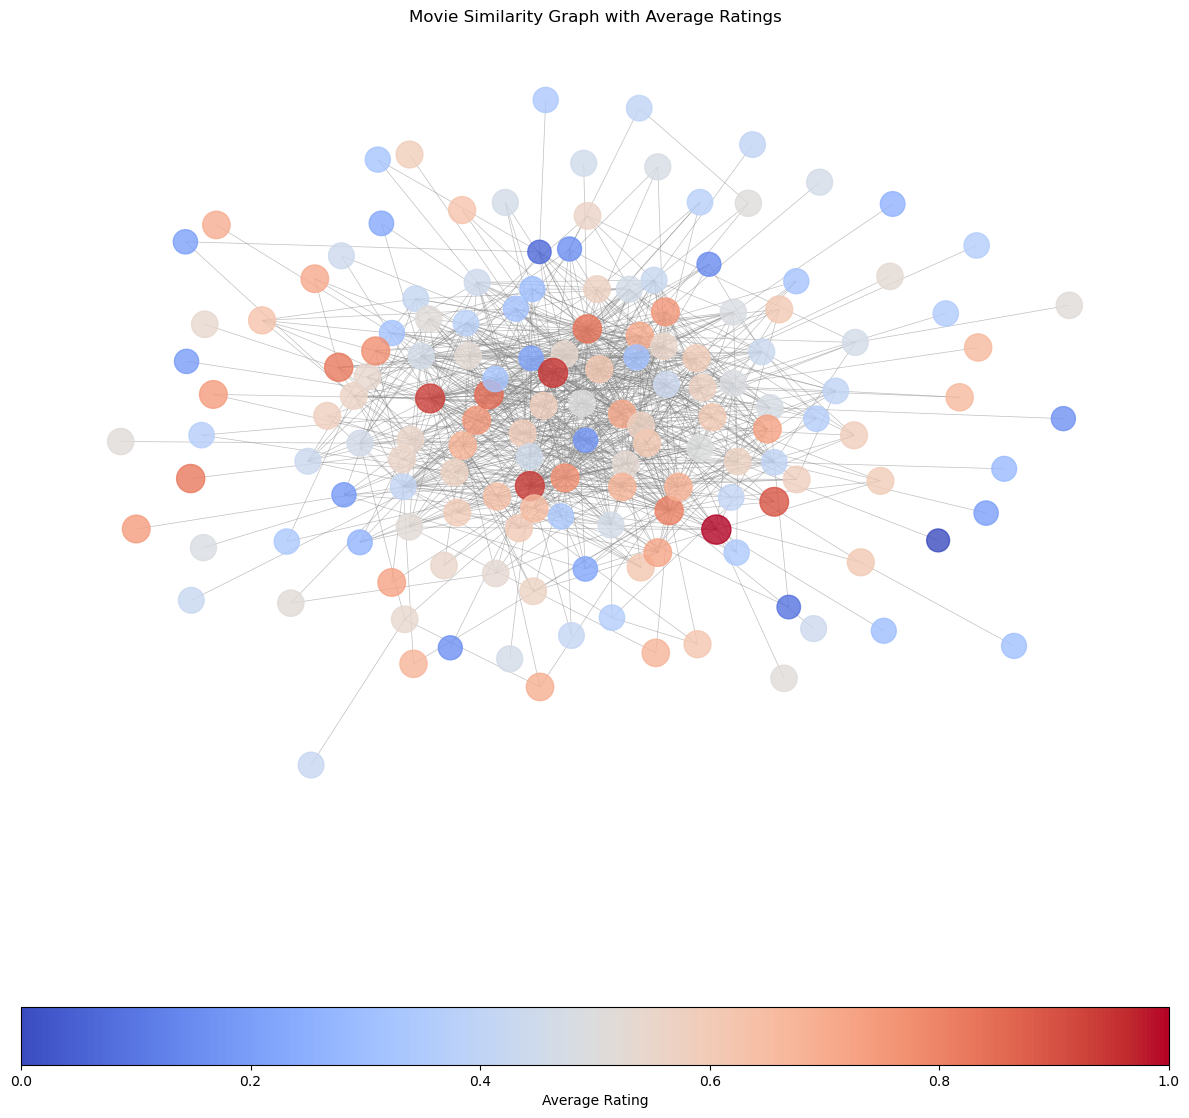

                                          Movie Names  Degree
0   Pirates of the Caribbean: The Curse of the Bla...      57
1                                     American Beauty      46
2                                             Shrek 2      44
3                                          Braveheart      44
4                                     The Sixth Sense      42
5                            The Silence of the Lambs      38
6                                      50 First Dates      36
7                                      Bruce Almighty      35
8                                     What Women Want      35
9                                     The Italian Job      35
10                                              Ghost      34
11                                   A Beautiful Mind      33
12                                    Men in Black II      32
13                             Something's Gotta Give      31
14                                   The Last Samurai      31
15      

In [17]:
# Sample a smaller fraction for faster processing
df_ratings_sample = df_ratings.sample(frac=0.01)

user_movies_dict = df_ratings_sample.groupby('User_ID')['Movie_ID'].apply(set).to_dict()

edges_to_add = Counter()
for movies in user_movies_dict.values():
    edges_to_add.update(combinations(movies, 2))

# Create an empty graph
G = nx.Graph()

threshold = 5
G.add_edges_from((movie1, movie2, {'weight': weight}) for (movie1, movie2), weight in edges_to_add.items() if weight >= threshold)

# Compute average ratings for each movie
avg_ratings = df_ratings_sample.groupby('Movie_ID')['Rating'].mean().to_dict()

# Map node sizes based on ratings, with a scaling factor for visibility
node_sizes = [avg_ratings.get(movie, 0) * 100 for movie in G.nodes()]

# Movie titles, assuming df_movies DataFrame exists
movie_titles = df_movies.set_index('Movie_ID')['Name'].to_dict()

# Identify the top 20 movies by degree (connectivity)
top_20_degree_movies = sorted(dict(G.degree()).items(), key=lambda x: x[1], reverse=True)[:20]
top_20_movie_ids = [movie[0] for movie in top_20_degree_movies]

# Use a faster layout with fewer iterations
layout = nx.kamada_kawai_layout(G)

# Node colors based on average ratings
node_colors = [avg_ratings.get(movie, 0) for movie in G.nodes()]
cmap = plt.cm.coolwarm

weights = [G[u][v]['weight'] for u, v in G.edges()]

fig, ax = plt.subplots(figsize=(12, 12))
nx.draw_networkx_nodes(G, layout, node_size=node_sizes, node_color=node_colors, cmap=cmap, alpha=0.8, ax=ax)
nx.draw_networkx_edges(G, layout, width=0.5, edge_color='grey', alpha=0.5, ax=ax)

ax.set_title("Movie Similarity Graph with Average Ratings")
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Average Rating', orientation='horizontal', ax=ax)
ax.axis('off')
plt.tight_layout()
plt.show()

# Create and display a table showcasing top 20 movies by degree
top_20_movie_names = [movie_titles[movie] for movie in top_20_movie_ids]
degree_values = [degree for _, degree in top_20_degree_movies]
data = {"Movie Names": top_20_movie_names, "Degree": degree_values}
df_top_20 = pd.DataFrame(data)

print(df_top_20)